<a href="https://colab.research.google.com/github/ErnCharles/ml_opne/blob/main/extras/exercises/03_pytorch_computer_vision_exercises.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 03. PyTorch Computer Vision Exercises

The following is a collection of exercises based on computer vision fundamentals in PyTorch.

They're a bunch of fun.

You're going to get to write plenty of code!

## Resources

1. These exercises are based on [notebook 03 of the Learn PyTorch for Deep Learning course](https://www.learnpytorch.io/03_pytorch_computer_vision/).
2. See a live [walkthrough of the solutions (errors and all) on YouTube](https://youtu.be/_PibmqpEyhA).
  * **Note:** Going through these exercises took me just over 3 hours of solid coding, so you should expect around the same.
3. See [other solutions on the course GitHub](https://github.com/mrdbourke/pytorch-deep-learning/tree/main/extras/solutions).

In [56]:
# Check for GPU
!nvidia-smi

Sun Sep 28 19:46:06 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.54.15              Driver Version: 550.54.15      CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  Tesla T4                       Off |   00000000:00:04.0 Off |                    0 |
| N/A   77C    P0             35W /   70W |     186MiB /  15360MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

In [57]:
# Import torch
import torch

# Exercises require PyTorch > 1.10.0
print(torch.__version__)

# TODO: Setup device agnostic code
device = "cuda" if torch.cuda.is_available() else "cpu"

2.8.0+cu126


## 1. What are 3 areas in industry where computer vision is currently being used?

## 2. Search "what is overfitting in machine learning" and write down a sentence about what you find.

## 3. Search "ways to prevent overfitting in machine learning", write down 3 of the things you find and a sentence about each.
> **Note:** there are lots of these, so don't worry too much about all of them, just pick 3 and start with those.

## 4. Spend 20-minutes reading and clicking through the [CNN Explainer website](https://poloclub.github.io/cnn-explainer/).

* Upload your own example image using the "upload" button on the website and see what happens in each layer of a CNN as your image passes through it.

## 5. Load the [`torchvision.datasets.MNIST()`](https://pytorch.org/vision/stable/generated/torchvision.datasets.MNIST.html#torchvision.datasets.MNIST) train and test datasets.

In [58]:
import torch
from torch import nn
from torchvision import datasets
from torchvision import transforms
from torchvision.transforms import ToTensor
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt
import pandas as pd
from tqdm.auto import tqdm

In [59]:
train_data = datasets.MNIST(root='my_data',
                       train=True,
                       transform=ToTensor(),
                       download=True,
                       target_transform=None,)
test_data = datasets.MNIST(root='my_data',
                       train=False,
                       transform=ToTensor(),
                       download=True,
                       target_transform=None,)

## 6. Visualize at least 5 different samples of the MNIST training dataset.

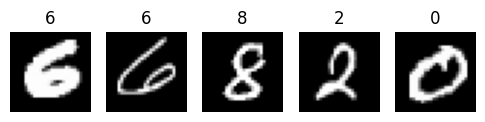

In [60]:
torch.manual_seed(42)
fig = plt.figure(figsize=(6,6))
rows, cols = 1, 5

for i in range(1, rows*cols+1):
  random_idx = torch.randint(0, len(train_data),size = [1]).item()
  img, lab = train_data[random_idx]
  fig.add_subplot(rows,cols,i)
  plt.imshow(img.squeeze(),cmap='gray')
  plt.title(lab)
  plt.axis(False)


## 7. Turn the MNIST train and test datasets into dataloaders using `torch.utils.data.DataLoader`, set the `batch_size=32`.

In [61]:
train_dataloader = DataLoader(batch_size=32,
                              shuffle=True,
                              dataset=train_data)
test_dataloader =  DataLoader(batch_size=32,
                              shuffle=True,
                              dataset=test_data)

In [62]:
len(train_data)
len(test_data)

10000

In [63]:
print(train_data.class_to_idx)
class_names = train_data.classes

{'0 - zero': 0, '1 - one': 1, '2 - two': 2, '3 - three': 3, '4 - four': 4, '5 - five': 5, '6 - six': 6, '7 - seven': 7, '8 - eight': 8, '9 - nine': 9}


In [64]:
print(f"Dataloaders: {train_dataloader,test_dataloader}")
print(f"length of train dataloaders: {len(train_dataloader)} of batches 32")
print(f"length of test dataloaders: {len(test_dataloader)} of batches 32")

Dataloaders: (<torch.utils.data.dataloader.DataLoader object at 0x7f1551617b30>, <torch.utils.data.dataloader.DataLoader object at 0x7f15b0b1a2a0>)
length of train dataloaders: 1875 of batches 32
length of test dataloaders: 313 of batches 32


## 8. Recreate `model_2` used in notebook 03 (the same model from the [CNN Explainer website](https://poloclub.github.io/cnn-explainer/), also known as TinyVGG) capable of fitting on the MNIST dataset.

In [65]:
class MNISTMODEL(nn.Module):
  def __init__(self, input_shape: int, hidden_units: int, output_shape: int):
    super().__init__()
    self.conv_block_1 = nn.Sequential(
        nn.Conv2d(in_channels=input_shape,
                  out_channels=hidden_units,
                  kernel_size=3,
                  stride=1,
                  padding=1),
        nn.SiLU(),
        nn.Conv2d(in_channels=hidden_units,
                  out_channels=hidden_units,
                  kernel_size=3,
                  stride=1,
                  padding=1),
        nn.SiLU(),
        nn.MaxPool2d(kernel_size=2)
    )
    self.conv_block_2 = nn.Sequential(
        nn.Conv2d(in_channels=hidden_units,
                  out_channels=hidden_units,
                  kernel_size=3,
                  stride=1,
                  padding=1),
        nn.SiLU(),
        nn.Conv2d(in_channels=hidden_units,
                  out_channels=hidden_units,
                  kernel_size=3,stride=1,
                  padding=1),
        nn.SiLU(),
        nn.MaxPool2d(kernel_size=2)
    )
    self.classifier = nn.Sequential(
        nn.Flatten(),
        nn.Linear(in_features=hidden_units*7*7,
                  out_features=output_shape)
    )
  def forward(self, x):
    x = self.conv_block_1(x)
    #print(f"Output of conv block 1:{x.shape}")
    x = self.conv_block_2(x)
    #print(f"Output of conv block 2:{x.shape}")
    x = self.classifier(x)
    #print(f"Output of classifier :{x.shape}")
    return x

In [66]:
import requests
from pathlib import Path

if Path("helper_functions.py").is_file():
  print("helper funct exists")
else:
  print("downloading helper func")
  request = requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/helper_functions.py")
  with open("helper_functions.py", "wb") as f:
    f.write(request.content)

helper funct exists


In [67]:
from helper_functions import accuracy_fn

In [68]:
from timeit import default_timer as timer
def print_train_time(start: float,
                     end: float,
                     device: torch.device = None):
  """Prints diff between start and end time."""
  total_time = end-start
  print(f"Train time on {device}: {total_time:.3f} seconds")
  return total_time

In [69]:
def train_step(
               model :torch.nn.Module,
               loss_function: torch.nn.Module,
               optimizer: torch.optim.Optimizer,
               dataloader: torch.utils.data.DataLoader,
               accuracy_fn,
               device: torch.device = device
               ):

  """
  uses a dataloader to train
  """
    # Training phase
  train_loss = 0
  train_acc = 0
  model.train()
  for batch, (X_train, y_train) in enumerate(dataloader):
    # Fix: Correctly move X_train and y_train to the device
    X_train, y_train = X_train.to(device), y_train.to(device)
    # Forward pass
    y_pred = model(X_train)
    loss = loss_function(y_pred, y_train)
    train_loss += loss.item()
    train_acc += accuracy_fn(y_true=y_train,y_pred=y_pred.argmax(dim=1)) # Fix: use y_train for accuracy
      # Backward pass
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    # Progress update
  train_loss /= len(dataloader)
  train_acc /= len(dataloader)
  print(f"Train Loss: {train_loss:.5f}| Train acc: {train_acc:.2f}") # Fix: use train_loss here

def test_step(
               model :torch.nn.Module,
               loss_function: torch.nn.Module,
               dataloader: torch.utils.data.DataLoader,
               accuracy_fn,
               device: torch.device = device
               ):
  # Testing phase
  test_loss = 0
  test_acc = 0
  model.eval()
  with torch.inference_mode():
    for batch, (X_test, y_test) in enumerate(dataloader):
      # Fix: Correctly move X_test and y_test to the device
      X_test,y_test = X_test.to(device),y_test.to(device)
      # Forward pass
      test_pred = model(X_test)
      loss = loss_function(test_pred, y_test)
      test_loss += loss.item()
      test_acc += accuracy_fn(y_true=y_test,y_pred=test_pred.argmax(dim=1))
    test_loss /= len(dataloader)
    test_acc /= len(dataloader)
    print(f"Test Loss: {test_loss:.5f}| Test acc: {test_acc:.2f}")

In [70]:
torch.manual_seed(42)
model_0 = MNISTMODEL(input_shape=1,
                         hidden_units=10,
                         output_shape=len(class_names)
                         ).to(device)


In [71]:
torch.manual_seed(42)

images = torch.randn(size=(32,3,64,64))
test_image = images[0]
print(f"image batch shape: {images.shape}")
print(f"Single image shape: {test_image.shape}")
print(f"Test images:\n {test_image}")

image batch shape: torch.Size([32, 3, 64, 64])
Single image shape: torch.Size([3, 64, 64])
Test images:
 tensor([[[ 1.9269,  1.4873,  0.9007,  ...,  1.8446, -1.1845,  1.3835],
         [ 1.4451,  0.8564,  2.2181,  ...,  0.3399,  0.7200,  0.4114],
         [ 1.9312,  1.0119, -1.4364,  ..., -0.5558,  0.7043,  0.7099],
         ...,
         [-0.5610, -0.4830,  0.4770,  ..., -0.2713, -0.9537, -0.6737],
         [ 0.3076, -0.1277,  0.0366,  ..., -2.0060,  0.2824, -0.8111],
         [-1.5486,  0.0485, -0.7712,  ..., -0.1403,  0.9416, -0.0118]],

        [[-0.5197,  1.8524,  1.8365,  ...,  0.8935, -1.5114, -0.8515],
         [ 2.0818,  1.0677, -1.4277,  ...,  1.6612, -2.6223, -0.4319],
         [-0.1010, -0.4388, -1.9775,  ...,  0.2106,  0.2536, -0.7318],
         ...,
         [ 0.2779,  0.7342, -0.3736,  ..., -0.4601,  0.1815,  0.1850],
         [ 0.7205, -0.2833,  0.0937,  ..., -0.1002, -2.3609,  2.2465],
         [-1.3242, -0.1973,  0.2920,  ...,  0.5409,  0.6940,  1.8563]],

        [[-

In [72]:
#a single conv layer
torch.manual_seed(42)
conv_layer = nn.Conv2d(in_channels=3,
                       out_channels=10,
                       kernel_size=(3,3),
                       stride=1,
                       padding=1)

In [73]:
conv_output = conv_layer(test_image)

In [74]:
conv_output.shape

torch.Size([10, 64, 64])

In [75]:
#looking at what max pool does
print(f"Test image original shape: {test_image.shape}")
print(f"Test image with unsqueezed dimension: {test_image.unsqueeze(0).shape}")

#Create a sample nn.maxpool2d layer
max_pool_layer = nn.MaxPool2d(kernel_size=2)

#through conv layer
test_image_through_conv = conv_layer(test_image.unsqueeze(dim=0))
print(f"shape after going through conv_laye(): {test_image_through_conv.shape}")

#through max pool layer
test_image_through_conv_and_max_pool = max_pool_layer(test_image_through_conv)

print(f"shape after going through conv and max pool layers: {test_image_through_conv_and_max_pool.shape}")

Test image original shape: torch.Size([3, 64, 64])
Test image with unsqueezed dimension: torch.Size([1, 3, 64, 64])
shape after going through conv_laye(): torch.Size([1, 10, 64, 64])
shape after going through conv and max pool layers: torch.Size([1, 10, 32, 32])


In [76]:
loss_fn  = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params=model_0.parameters(),lr=.1)

## 9. Train the model you built in exercise 8. for 5 epochs on CPU and GPU and see how long it takes on each.

In [77]:
torch.manual_seed(42)

train_start_gpu = timer()

epochs = 5

for epoch in tqdm(range(epochs)):
  print(f"Epoch: {epoch}\n-------")
  train_step(model = model_0,
             dataloader = train_dataloader,
             loss_function=loss_fn,
             optimizer=optimizer,
             accuracy_fn= accuracy_fn,
             device=device)
  test_step(model=model_0,
            dataloader=test_dataloader,
            loss_function=loss_fn,
            accuracy_fn=accuracy_fn,
            device=device)
  train_end_gpu = timer()

  total_train_time_model_2 = print_train_time(start=train_start_gpu,
                                              end=train_end_gpu,
                                              device=device)


  0%|          | 0/5 [00:00<?, ?it/s]

Epoch: 0
-------
Train Loss: 0.52435| Train acc: 81.35
Test Loss: 0.06984| Test acc: 97.90
Train time on cuda: 11.913 seconds
Epoch: 1
-------
Train Loss: 0.07027| Train acc: 97.80
Test Loss: 0.04820| Test acc: 98.28
Train time on cuda: 23.780 seconds
Epoch: 2
-------
Train Loss: 0.05422| Train acc: 98.28
Test Loss: 0.04560| Test acc: 98.52
Train time on cuda: 35.713 seconds
Epoch: 3
-------
Train Loss: 0.04587| Train acc: 98.55
Test Loss: 0.03986| Test acc: 98.55
Train time on cuda: 47.676 seconds
Epoch: 4
-------
Train Loss: 0.04083| Train acc: 98.70
Test Loss: 0.03694| Test acc: 98.73
Train time on cuda: 59.612 seconds


In [78]:
# Train time on cpu: 288.474 seconds
# Train time on gpu: 61.278 seconds

## 10. Make predictions using your trained model and visualize at least 5 of them comparing the prediciton to the target label.

In [79]:
#make and eval predictions with best model

def make_preds(model:torch.nn.Module
               ,data:list,
               device: torch.device = device):
  pred_probs = []
  model.eval()
  with torch.inference_mode():
    for sample in data:
      sample = torch.unsqueeze(sample, dim=0).to(device)
      #forward oass
      pred_logits = model(sample)

      pred_prob = torch.softmax(pred_logits.squeeze(),dim=0)

      pred_probs.append(pred_prob.cpu())

  return torch.stack(pred_probs)


In [80]:
import random
#random.seed(42)

test_samples = []
test_labels = []

for sample, label in random.sample(list(test_data), k=9):
  test_samples.append(sample)
  test_labels.append(label)

test_samples[0].shape

torch.Size([1, 28, 28])

Text(0.5, 1.0, '4 - four')

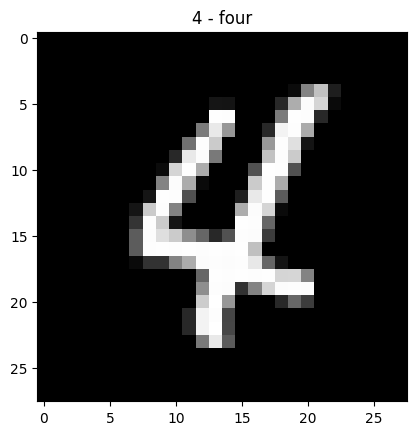

In [81]:
plt.imshow(test_samples[0].squeeze(),cmap="gray")
plt.title(class_names[test_labels[0]])

In [82]:
pred_probs = make_preds(model_0,
                        data=test_samples)
pred_probs[:2]

tensor([[3.3687e-10, 3.6000e-07, 4.7299e-08, 2.7844e-11, 1.0000e+00, 2.4052e-11,
         2.7238e-08, 8.7996e-08, 1.9550e-06, 1.1762e-09],
        [2.9243e-02, 8.9346e-02, 8.5303e-01, 1.1596e-05, 6.1320e-04, 1.8873e-07,
         4.2749e-05, 1.8063e-02, 5.1477e-03, 4.5032e-03]])

In [83]:
pred_classes = pred_probs.argmax(dim=1)
pred_classes

tensor([4, 2, 9, 1, 6, 5, 1, 0, 3])

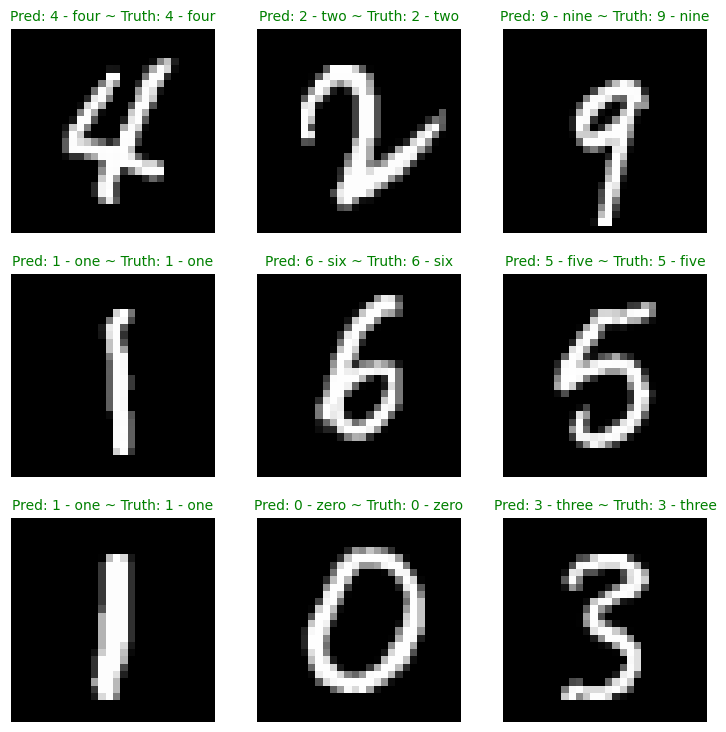

In [84]:
plt.figure(figsize=(9,9))
nrows = 3
ncols = 3

for i,  sample in enumerate(test_samples):
  plt.subplot(nrows,ncols,i+1)
  plt.imshow(sample.squeeze(),cmap = "gray")

  pred_label = class_names[pred_classes[i]]

  truth_label = class_names[test_labels[i]]

  title_text = f"Pred: {pred_label} ~ Truth: {truth_label}"

  #
  if pred_label == truth_label:
    plt.title(title_text,fontsize=10, c="g")
  else:
    plt.title(title_text,fontsize=10, c="r")
  plt.axis(False)

## 11. Plot a confusion matrix comparing your model's predictions to the truth labels.

In [85]:
y_preds =[]
model_0.eval()
with torch.inference_mode():
  for X, y in tqdm(test_dataloader, desc="Making predictions..."):
    X,y = X.to(device),y.to(device)
    y_logit = model_0(X)

    y_pred = torch.softmax(y_logit.squeeze(), dim=0).argmax(dim=1)

    y_preds.append(y_pred.cpu())
  #print(y_preds)
  y_pred_tensor = torch.cat(y_preds)

Making predictions...:   0%|          | 0/313 [00:00<?, ?it/s]

In [86]:
!pip install torchmetrics

In [87]:
import torchmetrics
import mlxtend
from torchmetrics import ConfusionMatrix
from mlxtend.plotting import plot_confusion_matrix

confmat = ConfusionMatrix(num_classes=len(class_names), task='multiclass')
confmat_tensor = confmat(preds=y_pred_tensor,
                         target=test_data.targets)

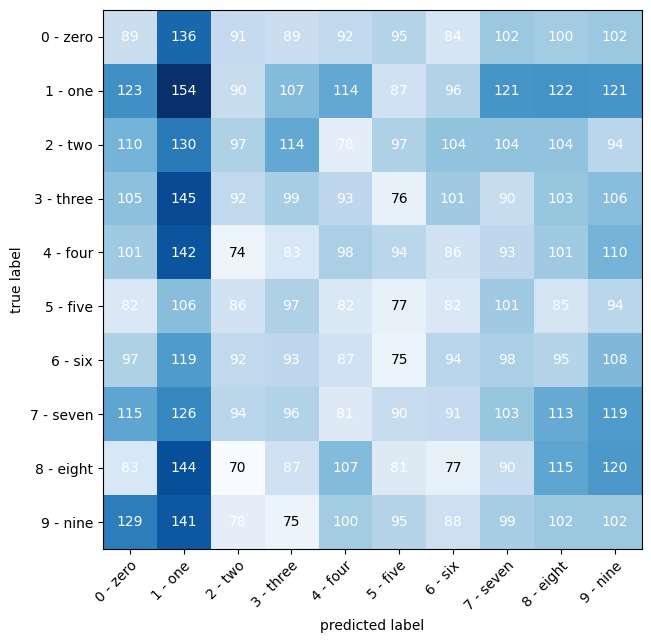

In [88]:
fig, ax = plot_confusion_matrix(
    conf_mat=confmat_tensor.numpy(),
    class_names=class_names,
    figsize=[10,7]
)

In [89]:
from pathlib import Path
MODEL_PATH = Path("models")
MODEL_PATH.mkdir(parents=True,
                 exist_ok=True)

MODEL_NAME = "03_py_comp_vis_model_2.pth"
MODEL_SAVE_PATH = MODEL_PATH/MODEL_NAME
torch.save(obj=model_0.state_dict(),
           f=MODEL_SAVE_PATH)

## 12. Create a random tensor of shape `[1, 3, 64, 64]` and pass it through a `nn.Conv2d()` layer with various hyperparameter settings (these can be any settings you choose), what do you notice if the `kernel_size` parameter goes up and down?

In [104]:
rand_ten = torch.randn(size=(1,3,64,64))

conv2d = nn.Conv2d(in_channels=3,
                   out_channels=10,
                   stride=1,
                   kernel_size=3,
                   padding=1,)

T = conv2d(rand_ten)

In [105]:
T.shape

torch.Size([1, 10, 64, 64])

## 13. Use a model similar to the trained `model_2` from notebook 03 to make predictions on the test [`torchvision.datasets.FashionMNIST`](https://pytorch.org/vision/main/generated/torchvision.datasets.FashionMNIST.html) dataset.
* Then plot some predictions where the model was wrong alongside what the label of the image should've been.
* After visualing these predictions do you think it's more of a modelling error or a data error?
* As in, could the model do better or are the labels of the data too close to each other (e.g. a "Shirt" label is too close to "T-shirt/top")?